#  Python: Plotting
## Chapter 10 & 11 from the Alex DeCaria textbook

Reading in and manipulating data is great, however, visualizing this data in some shape or form is often the end result for most programs! You have seen many basic plots already. This will just reinforce some basic plotting concepts.

**Before starting:** Make sure that you open up a Jupyter notebook session using OnDemand and copy this file for your `atmos5340/module_7 subdirectory`!



<br>

#  Basic plotting

Before we can start plotting data, we must import the matplotlib plotting library. We will primarily be working with the `pyplot` submodule today. 

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

In [44]:
#define the background "face" as a rgb color
plt.rcParams['axes.facecolor'] = [0.95,.95,.95] #makes a light grey background to the axis face
plt.rcParams['axes.labelsize'] = 14 #fontsize in pts
plt.rcParams['axes.titlesize'] = 14 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['legend.facecolor'] = 'w' 
plt.rcParams['savefig.transparent'] = False

Lets create a dummy data set to initially work with before we start working with 'real' data. Using NumPy, create the following 1-D array:

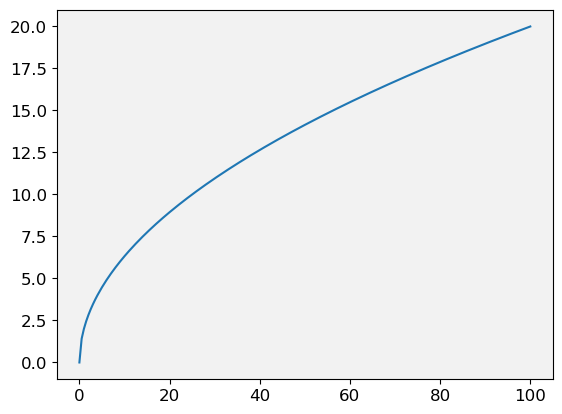

In [45]:
x = np.arange(0,100.5,0.5)
y = 2.0*np.sqrt(x) 
plt.plot(x,y)

What happened? 

Once you call the function pyplot.show() is called, which can be shorthanded as `plt.show()`, no more changes can be made to our plot or its axes. You don't need the plot.show() in a jupyter notebook because by default figures are displayed.

<br>

A matplotlib plot generally consists of a `figure` object and an `axes` object. In the example above, these were automatically generated for us using the `plt.plot()` function. However, if we want to have more control of our plot, such as adding muliple axes, we will want to have more control over our plotting routines. Here, we will want to store our plot as a figure object by setting setting plt.figure() to a variable. Once a figure has been created, axes objects can be created and placed on our figure using `add_axes()` method for the figure object. You can then define the area on the page that the plot will be located.

While there are many ways to plot without explicitly defining the figure and axes,
it is better to get used to them as all useful high quality plots will require them

For that reason, I encourage you to adopt "Axes" methods for plotting rather than "pyplot" methods

Most of the time it doesn't matter but see Table 10.1 on page 139 for situations where it does

<class 'matplotlib.figure.Figure'>


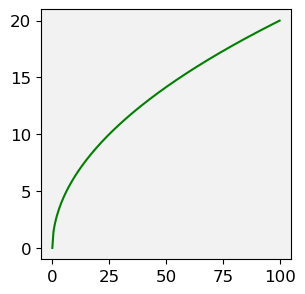

In [46]:
fig = plt.figure(figsize=(5,5))
print(type(fig))
#in the above we are explicitly defining the size to be 5x5 inches
#think of the plotting area as a canvas and in this case we are centering the plot
# and ony using 50% of the display area in the x and y directions
# the convention is where does the plot start in x and y and then width and height
#what is seen in jupyter is not the same as it is when we actually save it
ax = fig.add_axes([0.75,0.75,0.5,0.5])
ax.plot(x,y,'green')
plt.savefig('plot_1.png')
#open the plot in a "new browser tab" to see how the image is on the "page"

<br>

We can also plot multiple lines/markers on a single plot just by calling the ax.plot() function multiple times before showing the figure. This is also introducing the concept of subplots even though in this case there is only one "subplot". Note that the fig and ax are defined together


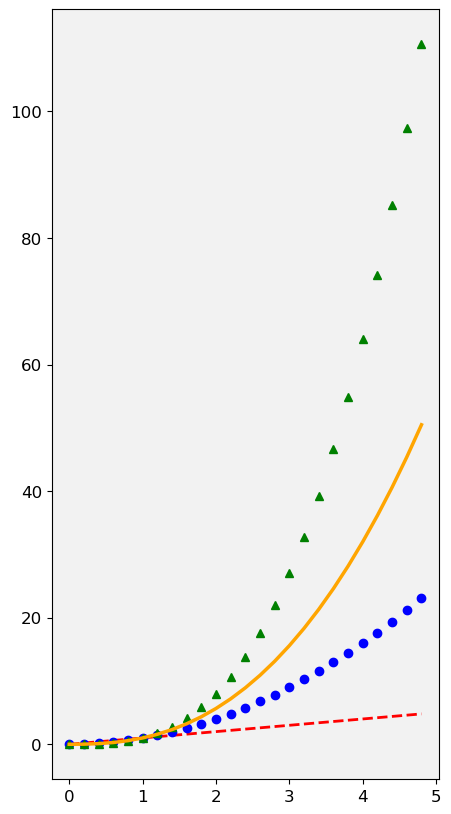

In [47]:
# evenly sampled time at 200ms intervals
t = np.arange(0., 5., 0.2)
fig = plt.figure(figsize=(5,10))
#return the axis for the plot and create one if there isn't one already defined
ax = plt.gca()
ax.plot(t, t, color="red", linestyle = "--",linewidth=2) 
ax.plot(t, t**2, color="blue", marker = "o",linewidth=0)
ax.plot(t, t**3, color="green", marker = "^",linewidth=0)
ax.plot(t, t**(5/2), color="orange", linestyle = "-",linewidth=5/2)
plt.savefig('plot_2.png')
#open the plot in a "new browser tab" to see how the image is on the "page"

<br>

> I really nice quick guide on Python line and marker options can be found [here](https://towardsdatascience.com/all-your-matplotlib-questions-answered-420dd95cb4ff)

Also, the figure below may be useful as it identifies plotting elements and the terminology used to name them. This could be helpful, especially when googling questions:<br>

<img src='../images/plot_elements.png' width=700px align='center' style='padding-left:100px'>



<br>

To add labels to our figure we can use  "set" for labels and titles 
(again there are simpler ways to do this, but better to learn a way that will work for all plots)


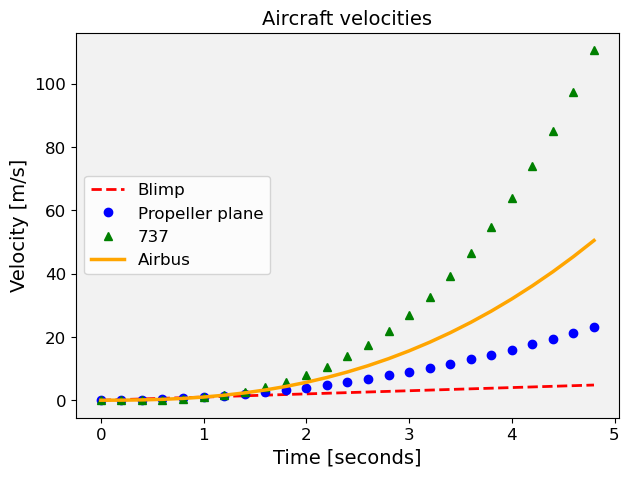

In [57]:
fig= plt.figure(figsize=(7,5))
ax = plt.gca()
ax.plot(t, t, color="red", linestyle = "--",linewidth=2,label="Blimp") 
ax.plot(t, t**2, color="blue", marker = "o",linewidth=0,label="Propeller plane")
ax.plot(t, t**3, color="green", marker = "^",linewidth=0,label="737")
ax.plot(t, t**(5/2), color="orange", linestyle = "-",linewidth=5/2,label="Airbus")
ax.set(xlabel='Time [seconds]')
ax.set(ylabel=('Velocity [m/s]'))
ax.set(title='Whatever')
ax.set(title='Aircraft velocities')
ax.legend(loc="center left")
plt.savefig('plot_3.png')

<br>

Lets say we wanted to zoom in on the lower velocity values. How would we do this? Fortunately, maplotlib has a function for explicitly setting the y `ylim` and x `xlim` axis limits:

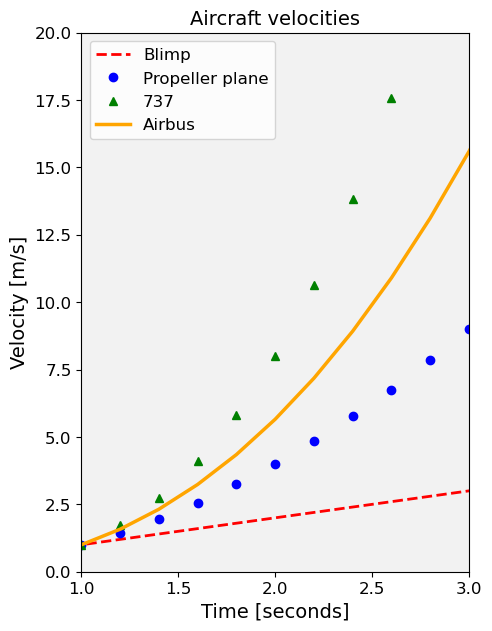

In [58]:
#use the subplot format even though on;y 1 plot
fig,ax = plt.subplots(1,1,figsize=(5,7))
ax.plot(t, t, color="red", linestyle = "--",linewidth=2,label="Blimp") 
ax.plot(t, t**2, color="blue", marker = "o",linewidth=0,label="Propeller plane")
ax.plot(t, t**3, color="green", marker = "^",linewidth=0,label="737")
ax.plot(t, t**(5/2), color="orange", linestyle = "-",linewidth=5/2,label="Airbus")
ax.set(xlabel='Time [seconds]')
ax.set(ylabel=('Velocity [m/s]'))
ax.set(title='Whatever')
ax.set(title='Aircraft velocities')
ax.legend(loc="upper left")

plt.ylim(0,20)
plt.xlim(1,3)

plt.savefig('plot_4.png')

<br>
We've already used subplot but only for one plot. The first two arguments, `nrows`, `ncols`, defines the number of panels. These are usually inputed as integers. In the code snipit below, we tell matplotlib that we want 2 rows and 1 column, so a 'vertical' 2 panel plot. This function returns a figure and axes object. In this example, specific names are given to the two separate axes in the figure.

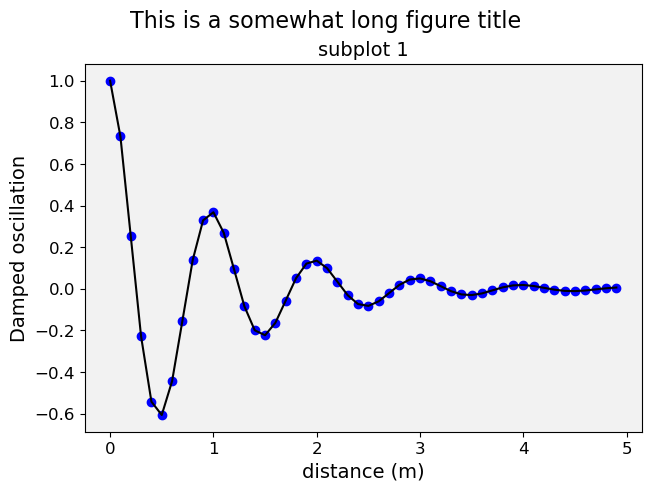

In [62]:
#Define a function
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

#Create some data points...
t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

#Lets create a plot!
#the constrained layout option makes the figure fit as much of the page as possible
fig, ax1 = plt.subplots(1,1, constrained_layout=True)
ax1.plot(t1, f(t1),color="blue", marker = "o",linewidth=0)
ax1.plot(t1, f(t1),color="black", linestyle = "-")
ax1.set_title('subplot 1')
ax1.set_xlabel('distance (m)')
ax1.set_ylabel('Damped oscillation')
#this is a title that is at the top
fig.suptitle('This is a somewhat long figure title', fontsize=16)

#ax2.plot(t2, np.cos(2*np.pi*t2),color='red',linestyle = "--")
#ax2.set_xlabel('time (s)')
#ax2.set_title('subplot 2')
#ax2.set_ylabel('Undamped')


plt.savefig('plot_5.png')   

You've seen and have the code for many examples of other types of plots:
- bar plots
- histograms
- box and whiskers
- time series
- plotting text on a figure
- drawing straight lines on a figure
- plotting time strings
- and much more

Use the codes provided to see examples. And sorry for the repetition- there are always multiple
ways to accomplish plotting (and python in general)

We'v plotted wind direction using the scatter function, but let's generate
a scatterplot, which will get used a bunch in  Chapter 4. To introduce those
let's get the data used in Chapter 2e again

In [51]:
#need to parse the date string
#this will be really useful later for just about any time you mess with datestrings
dateparse = lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z')
#there are times with no actual values (direction blank and wind speed and gust 0)
#those will get changed to NaN by the read_csv function
headers = ['STID','Date', 'Speed', 'Direction', 'Gust']
dtypes = {'STID': 'str','Date': 'str', 'Speed': 'float', 'Direction': 'float', 'Gust': 'float'}

df = pd.read_csv('../data/wbb_may_2020.txt', parse_dates=['Date'], date_parser=dateparse, \
                 names=headers,dtype = dtypes,na_filter=True,skiprows=8)
pd.set_option('display.float_format', lambda x: '%.1f' % x)
print(df)
# times are local (MDT)

      STID                      Date  Speed  Direction  Gust
0      WBB 2020-05-01 00:00:00-06:00    2.1      254.8   2.6
1      WBB 2020-05-01 00:01:00-06:00    2.6      258.5   3.2
2      WBB 2020-05-01 00:02:00-06:00    2.5      258.6   3.2
3      WBB 2020-05-01 00:03:00-06:00    2.1      253.7   2.9
4      WBB 2020-05-01 00:04:00-06:00    0.6      280.5   1.3
...    ...                       ...    ...        ...   ...
44635  WBB 2020-05-31 23:55:00-06:00    5.3      152.0   6.4
44636  WBB 2020-05-31 23:56:00-06:00    4.1      146.9   5.1
44637  WBB 2020-05-31 23:57:00-06:00    3.6      164.6   6.7
44638  WBB 2020-05-31 23:58:00-06:00    5.2      159.3   7.2
44639  WBB 2020-05-31 23:59:00-06:00    6.2      155.7   8.5

[44640 rows x 5 columns]


<br>
    
**Scatterplots:** What is the relationship between wind speed and direction? Do we see higher wind gusts from certain directions? 


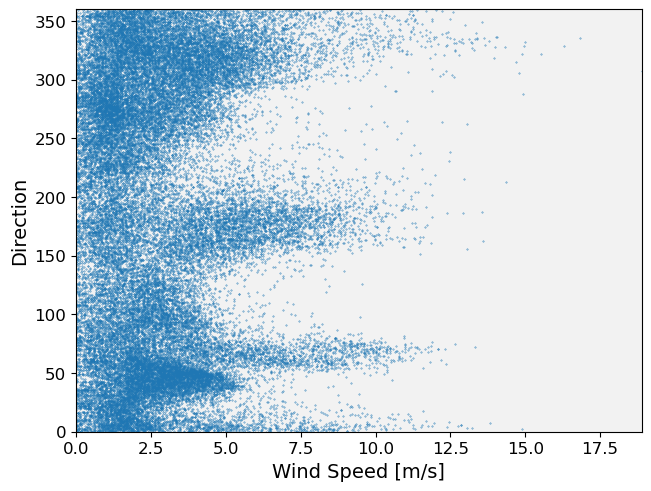

In [52]:
fig, ax = plt.subplots(1, 1, constrained_layout=True)
ax.scatter(df.Speed,df.Direction, marker='o',s=.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Wind Speed [m/s]',fontsize=14)
plt.ylabel('Direction',fontsize=14)
plt.xlim(0,df.Speed.max())
plt.ylim(0,360.)
plt.savefig('plot_6.png') 
# not sure that is super informative- the wind rose is a better way to handle

# making your figures ready for publication
There are many functions that allow you to make a figure look better.
Here are some. Once they are defined they apply to all subsequent figures


In [53]:
#define the background "face" as a rgb color
plt.rcParams['axes.facecolor'] = [0.95,0.95,0.95] #makes a light grey background to the axis face
plt.rcParams['axes.labelsize'] = 14 #fontsize in pts
plt.rcParams['axes.titlesize'] = 14 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['legend.facecolor'] = 'w' 
plt.rcParams['savefig.transparent'] = False

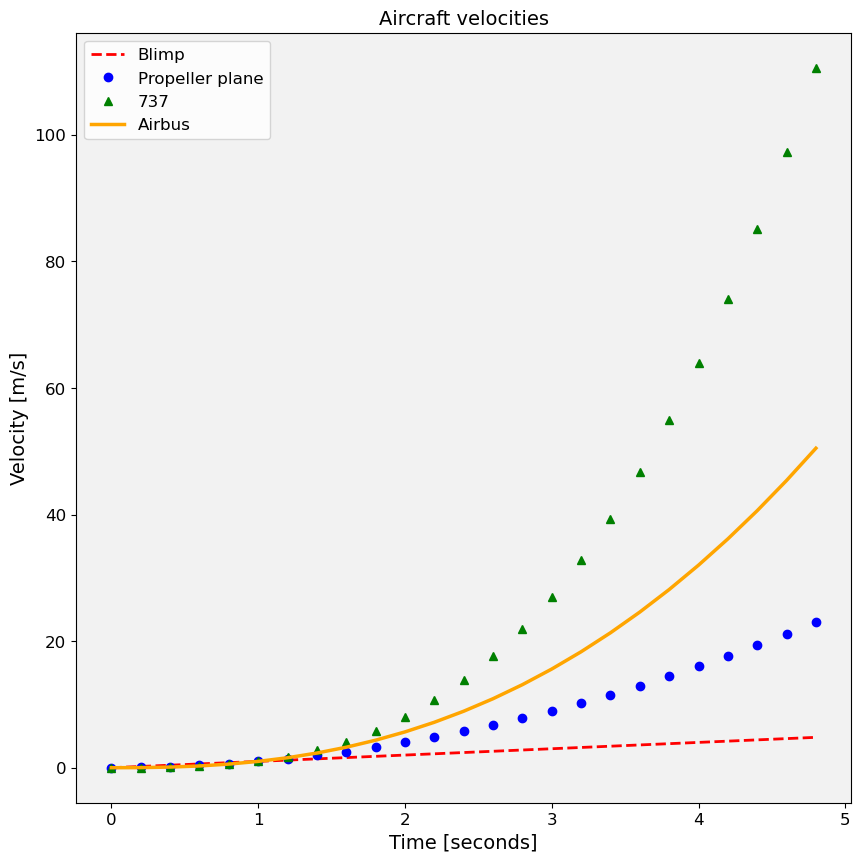

In [54]:
fig= plt.figure(figsize=(10,10))
ax = plt.gca()
ax.plot(t, t, color="red", linestyle = "--",linewidth=2,label="Blimp") 
ax.plot(t, t**2, color="blue", marker = "o",linewidth=0,label="Propeller plane")
ax.plot(t, t**3, color="green", marker = "^",linewidth=0,label="737")
ax.plot(t, t**(5/2), color="orange", linestyle = "-",linewidth=5/2,label="Airbus")
ax.set(xlabel='Time [seconds]')
ax.set(ylabel=('Velocity [m/s]'))
ax.set(title='Whatever')
ax.set(title='Aircraft velocities')
ax.legend(loc="upper left")
plt.savefig('plot_7.png')

# Handling colors and colormaps

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'G

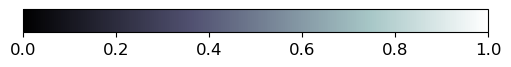

brg


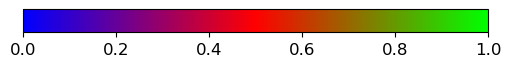

bwr


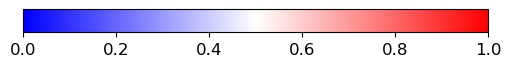

cool


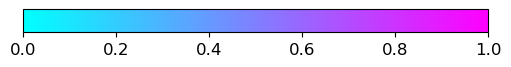

coolwarm


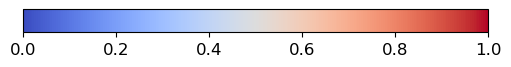

copper


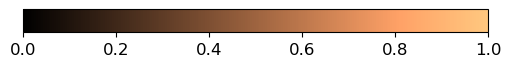

cubehelix


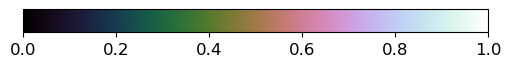

flag


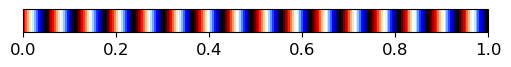

gist_earth


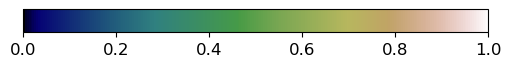

gist_gray


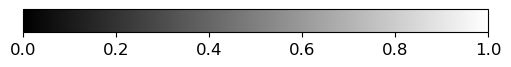

In [64]:
#colormaps- there are many!
print(plt.colormaps())

#function to plot one colormap
def plot_colorMaps(cmap):
    import matplotlib as mpl
    fig, ax = plt.subplots(figsize=(6,0.3))
    col_map = plt.get_cmap(cmap)
    mpl.colorbar.ColorbarBase(ax, cmap=col_map, orientation = 'horizontal')
    plt.show()
    
#loop over the first few. Try them all??
for cmap_id in plt.colormaps()[40:50]:
    print(cmap_id)
    plot_colorMaps(cmap_id)

<br><br>

# Want more practice!?

Check out the following webpages:<br>
https://matplotlib.org/2.0.2/users/pyplot_tutorial.html<br>
https://www.datacamp.com/community/tutorials/matplotlib-tutorial-python<br>
https://pythonprogramming.net/matplotlib-python-3-basics-tutorial/<br>
https://www.w3schools.com/PYTHON/matplotlib_intro.asp<br>
https://www.johnny-lin.com/pyintro/ed01/free_pdfs/ch09.pdf<br>
https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html<br>

